In [1]:
import pandas as pd
import numpy as np

In [2]:
sms_df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
sms_df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [4]:
sms_df.shape

(5572, 5)

## data cleaning

In [5]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 column
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
sms_df.shape

(5572, 2)

In [8]:
sms_df.sample(3)

,v1,v2
4585,spam,"Mila, age23, blonde, new in UK. I look sex wit..."
112,ham,I'm ok wif it cos i like 2 try new things. But...
4502,ham,Stupid.its not possible


In [9]:
# change the column names
sms_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
sms_df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
sms_df['target'] = encoder.fit_transform(sms_df['target'])

In [13]:
sms_df.head()  # ham = 0, spam=1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check missing values
sms_df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check duplicated entries
sms_df.duplicated().sum()

403

In [16]:
sms_df.drop_duplicates(keep='first',inplace=True)

In [17]:
sms_df.duplicated().sum()

0

# EDA

In [18]:
# check percentage of ham and spam
sms_df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

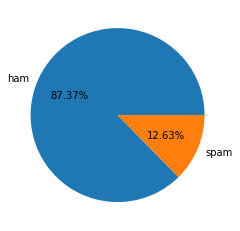

In [19]:
import matplotlib.pyplot as plt
plt.pie(sms_df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f%%')
plt.show()

In [20]:
# data is imbalanced

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
sms_df['num_characters'] = sms_df['text'].apply(len)

In [25]:
# fetch num of words
sms_df['num_words']=sms_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
sms_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# fetch num of sentences
sms_df['num_sentences'] = sms_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
sms_df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
sms_df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# check for ham msg
sms_df[sms_df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# for spam msg
sms_df[sms_df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Ham sms
- Ham sms contains average num characters is 70 per sms and 75% percentile is 90.
- Ham sms contains 17 avarage number of words per sms and 75% percentile is 22.
- Ham sms contains 2 average number of sentences per sms and 75% percentile is 2 

### Spam sms
- spam sms contains average num characters is 137 per sms and maximum 224 characters.
- spam sms contains 27 avarage number of words per sms and 75% percentile is 32.
- spam sms contains 3 average number of sentences per sms and 75% percentile is 4.

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

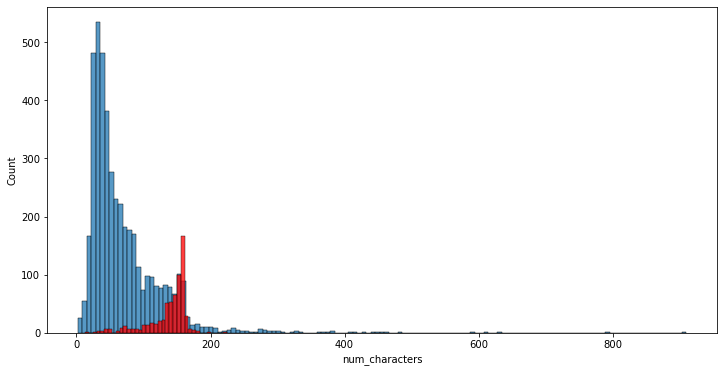

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(sms_df[sms_df['target']==0]['num_characters'])
sns.histplot(sms_df[sms_df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

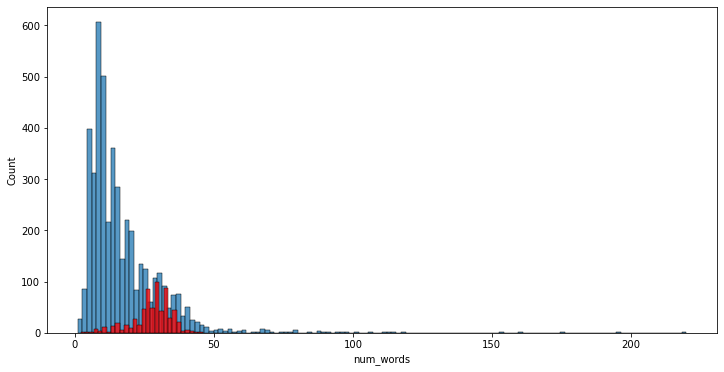

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(sms_df[sms_df['target']==0]['num_words'])
sns.histplot(sms_df[sms_df['target']==1]['num_words'],color='red')

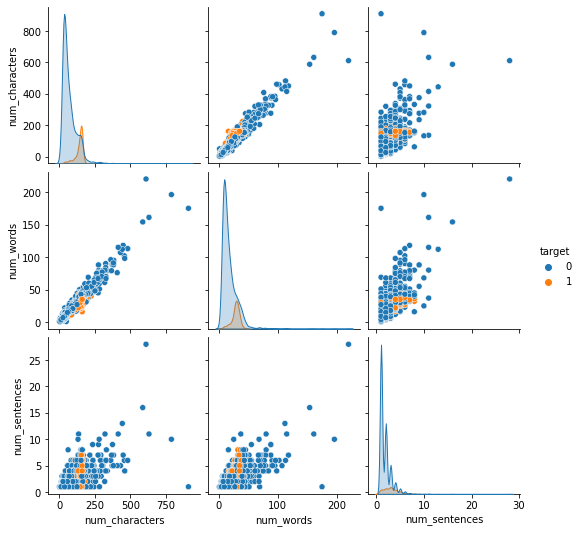

In [35]:
sns.pairplot(sms_df,hue='target')

In [36]:
sms_df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

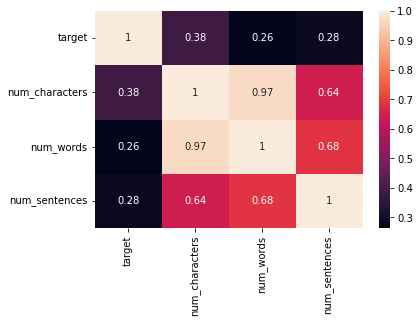

In [37]:
sns.heatmap(sms_df.corr(), annot=True)

## Data Preprocessing
. Lower case
. Tokenization
. Removing special characters
. Removing stop words and punctuation
. Stemming

In [38]:
import string 
nltk.download('stopwords')
print(string.punctuation)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [40]:
transform_text('I Loved the YT lectures on 23 Machine Learning. How about you?')

'love yt lectur 23 machin learn'

In [41]:
sms_df['transformed_words']=sms_df['text'].apply(transform_text)

In [42]:
sms_df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

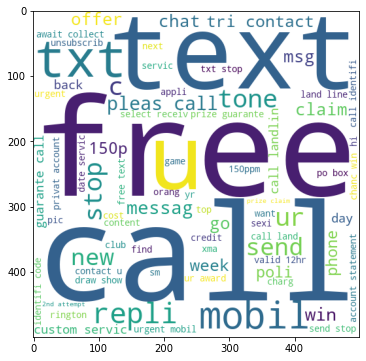

In [44]:
spam_wc=wc.generate(sms_df[sms_df['target']==1]['transformed_words'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

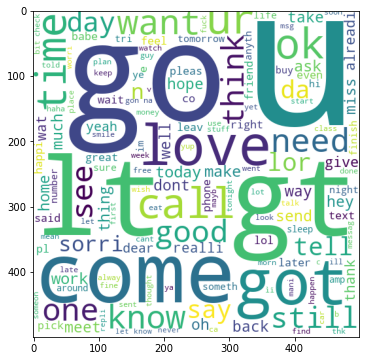

In [45]:
pam_wc=wc.generate(sms_df[sms_df['target']==0]['transformed_words'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
# top 30 words ham and top 30 words spam find 
spam_corpus=[]
for msg in sms_df[sms_df['target']==1]['transformed_words'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


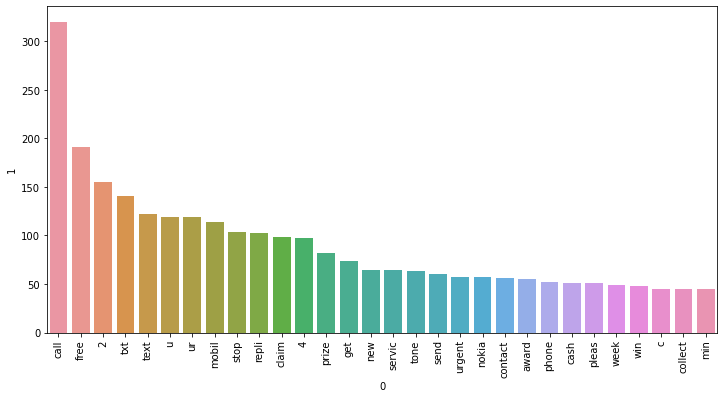

In [48]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ham_corpus=[]
for msg in sms_df[sms_df['target']==0]['transformed_words'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

35394

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


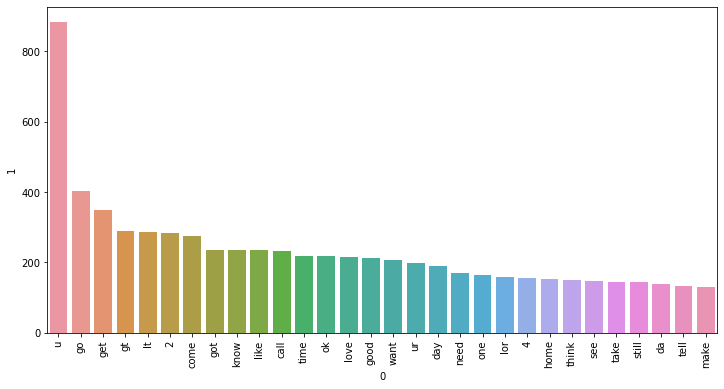

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## model building

In [52]:
sms_df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(sms_df['transformed_words']).toarray()

In [55]:
X.shape

(5169, 3000)

In [56]:
y = sms_df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [60]:
X_train.shape

(4135, 3000)

In [61]:
y_train.shape

(4135,)

In [62]:
X_test.shape

(1034, 3000)

In [63]:
y_test.shape

(1034,)

In [64]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


# Lets check model

In [69]:
sen = 'You won $2500 in share market, for claim your reward visit on below link'

In [70]:
tr_text=transform_text(sen)
a = tfidf.transform([tr_text]).toarray()
result = mnb.predict(a)
if result == 0:
    print('not spam')
else:
    print('spam')

spam


## choose MuntinomialNB model
- its gives best result

In [72]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(transform_text,open('transform_text.pkl','wb'))